## Feature and target data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../moreCleanData.csv", index_col=False)
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer automatic,PAYMENTMETHOD_Credit card automatic,PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,10,0,0,29.75,301.90,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,1,39.65,39.65,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,1,0,0,30.20,30.20,0,...,1,0,0,1,0,0,0,0,1,0


In [3]:
#df.isnull().sum()

In [4]:
#df.info()

In [5]:
#Prepare target & features for modeling
cols = df.columns
train_cols = cols.drop(["CHURN"])
features = df[train_cols]
target = df["CHURN"]
train_cols

Index(['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'PHONESERVICE', 'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES',
       'MONTHLY_MINUTES_OF_USE', 'TOTAL_MINUTES_OF_USE', 'MONTHLY_SMS',
       'TOTAL_SMS', 'MULTIPLELINES_No', 'MULTIPLELINES_No phone service',
       'MULTIPLELINES_Yes', 'INTERNETSERVICE_DSL',
       'INTERNETSERVICE_Fiber optic', 'INTERNETSERVICE_No',
       'ONLINESECURITY_No', 'ONLINESECURITY_No internet service',
       'ONLINESECURITY_Yes', 'ONLINEBACKUP_No',
       'ONLINEBACKUP_No internet service', 'ONLINEBACKUP_Yes',
       'DEVICEPROTECTION_No', 'DEVICEPROTECTION_No internet service',
       'DEVICEPROTECTION_Yes', 'TECHSUPPORT_No',
       'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes', 'STREAMINGTV_No',
       'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No', 'STREAMINGMOVIES_No internet service',
       'STREAMINGMOVIES_Yes', 'CONTRACT_Month-to-month', 'CONTRACT_One year',
       'CONTRAC

## Logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(features, target)
predictions = lr.predict(features)
# False positives.
fp_filter = (predictions == 1) & (df["CHURN"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (df["CHURN"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (df["CHURN"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (df["CHURN"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

0.4777956126270733
0.10050251256281408


In [7]:
# KFold cross-validation and balanced class-weight
from sklearn.cross_validation import cross_val_predict, KFold
lr = LogisticRegression(class_weight="balanced")
kf = KFold(features.shape[0], random_state=1)
lr.fit(features, target)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (df["CHURN"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (df["CHURN"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (df["CHURN"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (df["CHURN"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(f"tpr: {tpr}")
print(f"fpr: {fpr}")
#0.56,0.10;bal 0.79,0.27;
### BEGIN SOLUTION
print(f"First 10 Predictions:   {predictions[:20].tolist()}")
print(f"First 10 Actual labels: {target.values[:20].tolist()}")
### END SOLUTION
# Model Accuracy
print('Test Acc: %.3f' % lr.score(features, target))

from sklearn.metrics import roc_curve, auc, roc_auc_score
auc = roc_auc_score(target, predictions)
print(f"auc: {auc}")
# Calculate classification report
target_names=['1','0']
from sklearn.metrics import classification_report
print(classification_report(target, predictions,
                            target_names=target_names))

C:\Users\ying\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


tpr: 0.8089572907814812
fpr: 0.30640760362900477
First 10 Predictions:   [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
Test Acc: 0.725
auc: 0.7512748435762382
             precision    recall  f1-score   support

          1       0.91      0.69      0.79     87958
          0       0.49      0.81      0.61     31773

avg / total       0.80      0.72      0.74    119731



In [8]:
# Setting a penalty to the class-weight
penalty=penalty = {
    0: 1,
    1: 2
}

lr = LogisticRegression(class_weight=penalty)
lr.fit(features,target)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (df["CHURN"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (df["CHURN"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (df["CHURN"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (df["CHURN"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)
### BEGIN SOLUTION
print(f"First 10 Predictions:   {predictions[:20].tolist()}")
print(f"First 10 Actual labels: {target.values[:20].tolist()}")
### END SOLUTION

0.7501337613697164
0.25339366515837103
First 10 Predictions:   [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]
First 10 Actual labels: [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]


## Random forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight="balanced", random_state=1)
rf.fit(features, target)
kf = KFold(features.shape[0], random_state=1)
predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

# False positives.
fp_filter = (predictions == 1) & (df["CHURN"] == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (df["CHURN"] == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (df["CHURN"] == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (df["CHURN"] == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)
### BEGIN SOLUTION
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {target.values[:10].tolist()}")
### END SOLUTION

1.0
0.0
First 10 Predictions:   [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


## BC: Neural Network Model

In [10]:
# Generate some fake regression data with 10 features
X = features
y = target
#y = y.reshape(-1, 1)

print(X.shape)
print(y.shape)

(119731, 44)
(119731,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [13]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [14]:
# Create the model using the MLP Classifier
from sklearn.neural_network import MLPClassifier 

model = MLPClassifier(hidden_layer_sizes=(3,), max_iter=1000, random_state=1)
#model=MLPClassifier(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [15]:
model.fit(X_train_scaled, y_train.ravel())
model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [16]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8076460500233859
Testing Score: 0.8092072294791701


In [17]:
predictions = model.predict(X_test_scaled)
#len(predictions),len(y_test)
#predictions=predictions.reshape(-1,1)
predictions
#y_test

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)
#(30:0.55,0.12;3:0.54,0.10)

0.5119611104004094
0.08572978838849701


In [19]:
### BEGIN SOLUTION
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {target.values[:10].tolist()}")
### END SOLUTION

First 10 Predictions:   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]


## BC: Logistic regression

In [20]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = features
y = target
print(X.shape, y.shape)

(119731, 44) (119731,)


In [21]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
### END SOLUTION

In [22]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier
### END SOLUTION

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
### BEGIN SOLUTION
classifier.fit(X_train, y_train)
### END SOLUTION

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
### BEGIN SOLUTION
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
### END SOLUTION

Training Data Score: 0.7875231074188734
Testing Data Score: 0.784385126783149


In [25]:
predictions = classifier.predict(X_test)

In [26]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

0.5014478156867682
0.11341518872214643


In [27]:
### BEGIN SOLUTION
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")
### END SOLUTION

First 10 Predictions:   [0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


## BC: Decision tree & Random forest

In [28]:
from sklearn import tree

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

In [30]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
clf.score(X_test, y_test)

1.0

In [31]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'

In [32]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

1.0
0.0


In [33]:
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
First 10 Actual labels: [1, 0, 0, 0, 0, 0, 1, 0, 1, 1]


In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf.score(X_test, y_test)

1.0

In [35]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

1.0
0.0


In [36]:
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
First 10 Actual labels: [1, 0, 0, 0, 0, 0, 1, 0, 1, 1]


## Clustering (Kmeans)

In [37]:
# Create a kmeans model using k = 3
# YOUR CODE HERE
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [38]:
#df.drop(['age'], axis = 1, inplace = True)
x_data = df.as_matrix()
x_data

array([[ 0.,  0.,  1., ...,  0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  1.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.]])

In [39]:
# Fit the model to the data
# YOUR CODE HERE
kmeans.fit(x_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [40]:
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
# YOUR CODE HERE
predicted_clusters=kmeans.predict(x_data)

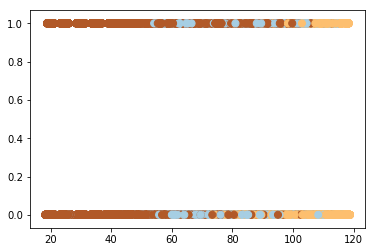

In [41]:
# Plot the clusters
plt.scatter(x_data[:, 7], x_data[:, 13], c=predicted_clusters, s=50, cmap='Paired')

In [42]:
# Bonus
# Print the cluster centers and cluster labls
# YOUR CODE HERE
centers=kmeans.cluster_centers_ 
labels=kmeans.labels_

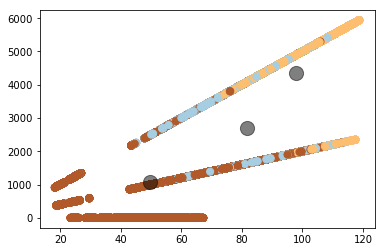

In [43]:
# Plot the data using the cluster centers and cluster labls
plt.scatter(x_data[:, 7], x_data[:, 9], c=labels, s=50, cmap='Paired')
plt.scatter(centers[:, 7], centers[:, 9], c='black', s=200, alpha=0.5)

## KNN

In [44]:
import matplotlib.pyplot as plt
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [45]:
#iris = load_iris()

In [46]:
X = features
y = target
#y = y.reshape(-1, 1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

#X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
X_scaler = StandardScaler().fit(X_train)

In [49]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/1.000
k: 3, Train/Test Score: 1.000/1.000
k: 5, Train/Test Score: 1.000/1.000
k: 7, Train/Test Score: 1.000/1.000
k: 9, Train/Test Score: 1.000/1.000
k: 11, Train/Test Score: 1.000/1.000
k: 13, Train/Test Score: 1.000/1.000
k: 15, Train/Test Score: 0.999/0.998
k: 17, Train/Test Score: 0.998/0.994
k: 19, Train/Test Score: 0.993/0.979


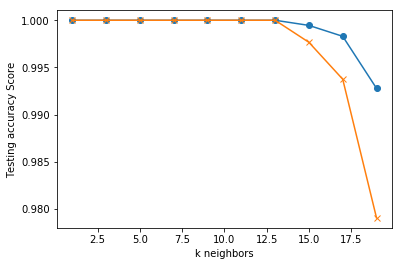

In [51]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [52]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test, y_test))

k=15 Test Acc: 0.998


In [53]:
#new_iris_data = [[4.3, 3.2, 1.3, 0.2]]
predictions = knn.predict(X_test)

In [54]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)

0.9949641193503714
0.001364256480218281


In [55]:
print(f"First 10 Predictions:   {predictions[:10].tolist()}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
First 10 Actual labels: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


## BC: SVM

In [56]:
# Dataset
data = df[train_cols] #features
target = df["CHURN"]
feature_names = data.columns
data.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,PAPERLESSBILLING,MONTHLYCHARGES,TOTALCHARGES,MONTHLY_MINUTES_OF_USE,...,STREAMINGMOVIES_No,STREAMINGMOVIES_No internet service,STREAMINGMOVIES_Yes,CONTRACT_Month-to-month,CONTRACT_One year,CONTRACT_Two year,PAYMENTMETHOD_Bank transfer automatic,PAYMENTMETHOD_Credit card automatic,PAYMENTMETHOD_Electronic check,PAYMENTMETHOD_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
2,0,0,0,0,10,0,0,29.75,301.90,0,...,1,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,1,39.65,39.65,0,...,0,0,1,1,0,0,0,0,1,0
4,1,0,1,1,1,0,0,30.20,30.20,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)

In [ ]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

In [ ]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

In [ ]:
# Calculate classification report
target_names=['yes','no']
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

In [ ]:
print(f"First 10 Predictions:   {predictions[:20].tolist()}")
print(f"First 10 Actual labels: {y_test[:20].tolist()}")

In [ ]:
# False positives.
fp_filter = (predictions == 1) & (y_test == 0)
fp = len(predictions[fp_filter])

# True positives.
tp_filter = (predictions == 1) & (y_test == 1)
tp = len(predictions[tp_filter])

# False negatives.
fn_filter = (predictions == 0) & (y_test == 1)
fn = len(predictions[fn_filter])

# True negatives
tn_filter = (predictions == 0) & (y_test == 0)
tn = len(predictions[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
print(tpr)
print(fpr)